# Machine Learning: 
A simple example of a Suport Vector Maschine (SVM)
---

Task:
---
separate a set of 2D points in two classes
---

Datenrepräsentation im Maschinellen Lernen wir häufig so gewählt
---

Bsp: Emails auf einem Webserver wurden durchsucht und deren Inhalte in Zahlen abstahiert, so dass Sie in einem 2D Koordinatensystem dargestellt werden können. Wir wollen nun SPAM von normalen eMails unterscheiden.

<img src="figures/data_representation.svg" width="75%">  

Data = X (Matrix) und Labels = y (Vektor)
---
<img src="figures/supervised_scikit_learn.png" width="100%"> 


Bedeutung des Zahlenbeispiels könnte auch sein:
---
Bsp2: Ein Biologe sammelt eine bestimmte Sorte Blumen und bestimmt die Maße der Blütenblätter, die gegeneinander in einem 2D Koordinatensystem aufgetragen werden können. Ziel ist es nun die zwei Unterarten der Blumen aus den Maßen zu klassifizieren.
<img src="figures/petal_sepal.jpg" width="20%">


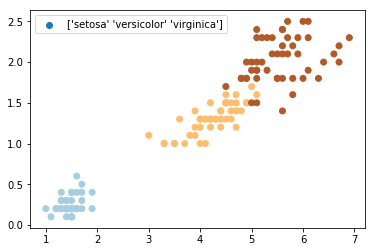

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.datasets import load_iris

iris = load_iris()
# import some data to play with
#iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired,label=iris.target_names)
plt.legend()
plt.show()

Bsp3: Fernerkundung 
---
Pixel Messwerte aus zwei Kanälen werden gegeneinander in einem 2D Koordinatensystem dargestellt. Nun wollen wir bspw. Wasser von Vegetation unterscheiden...  

<img src="figures/FE_Class.png" width="100%">



Experimente mit Zufallszahlen
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#externes funktionsfile Functions.py bei jeder Änderung im Code neu laden
%load_ext autoreload
%autoreload 2

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

print 'X : {}'.format(X.T)
print 'Y : {}'.format(Y)
plt.plot(X[:,0],X[:,1],'r.')
plt.xlabel('1.Spalte von X')
plt.ylabel('2.Spalte von X')
plt.title('Keine Klassen bzgl. Y nicht unterschieden...')
plt.show()

Diese Punkte sollen nun in zwei Klassen eingeteilt werden, die von einander zu trennen sind.
Wir suchen also nach einer Linie (im 2D), die den 2D Raum in zwei Bereiche (Klassen) aufteilt. Eine Linie, die einen Punkthaufen links von sich und den anderen Punkthaufen rechts von sich hat, also die beide Punkthaufen eindeutig von einander trennt. Diese Linie könnte z.B. eine Gerade sein.

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(X[:, 0],-3*X[:,0]-0.6,'g--',label='zufaellige, manuelle Trennung')
plt.xlabel('1.Spalte von X')
plt.ylabel('2.Spalte von X')
plt.legend()
plt.ylim(-4,4)
plt.title('Farbgebung signalisiert die Klasse')


Wie kann die Trennung der Klassen erreicht werden?

In [ ]:
s,p=np.polyfit(X[:, 0], X[:, 1],1)

plt.figure(figsize=(20,5))
plt.subplot(121),plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired),plt.xlabel('1.Spalte von X'),plt.ylabel('2.Spalte von X')

plt.title('Punkte der 2 Klassen...')#, plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.plot(X[:, 0],s*X[:,0]+p,'g-',label='Linear Fit'),plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired), plt.xlabel('1.Spalte von X'), plt.ylabel('2.Spalte von X')
plt.title('Lineare Regression...passt hier nicht!')#, plt.xticks([]), plt.yticks([])
#plt.gca().axes.get_xaxis().set_visible(True)
#plt.gca().axes.get_yaxis().set_visible(True)
plt.axis("on")
plt.show()


Die trennende Linie, die wir suchen, kann z.B. durch eine lineare Support Vektor Maschine (https://de.wikipedia.org/wiki/Support_Vector_Machine)  (zur Klassifikation) bestimmt werden. Die SVM liefert einen Normalenvektor (https://de.wikipedia.org/wiki/Normalenform), der eine trennende Gerade eindeutig bestimmt. 


Eine SVM wird durch die Minimierung einer ganz bestimmten Verlustfunktion berechnet. Sehr ähnlich zu dem Ansatz der linearen Regression, die die Quadratsumme der Verbesserungen minimierte.

Bei einer SVM sieht das allerdings so aus:

\begin{align}
    \underset{\theta} {argmin} \sum_{i=1}^{n}   l \bigl (  f_{ \theta}(x_i),y_i  \bigr) + \frac{1}{\lambda} \cdot \Omega(\theta)
 \end{align}
 
dabei ist $\theta$ der Parameter Vektor (Normalen Vektor) den wir suchen, $l$ ist die Verlustfunktion, $ f_{ \theta}(x_i)$ die Modelvorhersage , $y_i$ sind die wahren Werte, $\lambda$ die Regularisierungstärke und $\Omega(\theta)$ der Regularisierungs-Term. Abhängig vom Regularisierungs-Term und der Verlustfunktion beschreibt die obige Gleichung verschiedene lineare Modelle wie z.B.  Perceptron, lineare SVM oder Ridge-Regression bzw. Logistic-Regression.


Bei einer SVM ist die Verlustfunktion der sog. Hinge-Loss: $l_{hinge} $


\begin{align}
l_{hinge} \big (f_{\theta}(x_i), y_i \big ) = \begin{cases} 0, & \mbox{ if   }   1 - y_i \cdot f_{\theta}(x_i) \le 0 \\ 1 - y_i \cdot  f_{\theta}(x_i) , & \mbox{ if   } 1 - y_i \cdot f_{\theta}(x_i) > 0 \end{cases} = max \big( 0 , 1 - y_i \cdot  f_{\theta}(x_i)  \big )
\end{align}


$y_i$            ... TrueLabel, wahrer Wert, richtige Klasse, korrekte bekannte Antwort

$f_{\theta}(x_i)$... Modell $f_{\theta}$ angewendet auf die Daten $x_i$, Vorhersage des Models 

Die Verlustfunktion dient zur Messung der Güte der Vorhersagen des Modells.
SVM's können auch für Regressionsprobleme verwendet werden...  

https://de.wikipedia.org/wiki/Geradengleichung   |  http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
#  Eine SVM erstellt man mit folgenden Ziele, clf... steht für Klassifikator, engl. Classifier 
clf = svm.SVC(kernel='linear')      # SVC 

# SVM an die Trainingsdaten anpassen mit...
clf.fit(X, Y)


# get the separating hyperplane, Berechnung nachvollziehen
w = clf.coef_[0]
print 'Normalenvektor: {} '.format(w)
print '       '
a = -w[0] / w[1]
print 'Steigung: {} und y-Schnittpunkt: {} der Trennlinie'.format(a, (clf.intercept_[0]) / w[1] )
print '       '
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
#print b
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(20,10))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=120, facecolors='none',label='Support-Vectors')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlim(-4,4)
plt.ylim(-7,7)

plt.plot(xx, yy, 'k-',label='SVM - Trennlinie der Klassen')         #... Trennlinie, Ergebnis der SVM
plt.plot(xx, yy_down, 'k--')   #... unterer Rand (lower Margin)  
plt.plot(xx, yy_up, 'k--')     #... oberer Rand (upper Margin)  
plt.xlabel('1.Spalte von X')
plt.ylabel('2.Spalte von X')
plt.title('Farbgebung signalisiert die Klasse')
plt.legend()
# Kenntlichmachung der Support-Vektors, Punkte die den Margin festlegen
plt.show()

Ist die Trennline durch die SVM einmal gefunden, kann dieses Modell zur Vorhersage der Klasse für neue noch nicht gesehene Daten genutzt werden. Siehe folgendes Beispiel:


Punkte sehr leicht linear trennbar
---

In [ ]:
Xnew = np.r_[np.random.randn(10, 2) - [2.2, 1.9], np.random.randn(10, 2) + [2.5, 2.4]]
Ynew = [0] * 10 + [1] * 10

plt.plot(Xnew[:,0],Xnew[:,1],'r.')
plt.show()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew, cmap=plt.cm.Paired)
plt.show()


Ynew_pred=clf.predict(Xnew)

plt.plot(xx, yy, 'k-',label='SVM - Trennlinie der Klassen')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew_pred, cmap=plt.cm.Paired)
plt.ylim(-5,5)
plt.show()

diese Punkte liegen näher beieinander - Unterscheidung der Klassen schwieriger
---

In [ ]:
Xnew = np.r_[np.random.randn(10, 2) - [1.2, 1.0], np.random.randn(10, 2) + [0.5, 1.4]]
Ynew = [0] * 10 + [1] * 10

plt.plot(Xnew[:,0],Xnew[:,1],'r.')
plt.show()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew, cmap=plt.cm.Paired)
plt.show()


Ynew_pred=clf.predict(Xnew)

plt.plot(xx, yy, 'k-',label='SVM - Trennlinie der Klassen')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew_pred, cmap=plt.cm.Paired)
plt.ylim(-5,5)
plt.show()

Überlappung sehr stark - nicht mehr linear trennbar, ohne Fehlklassifizierung
--

In [ ]:
Xnew = np.r_[np.random.randn(10, 2), np.random.randn(10, 2)]
Ynew = [0] * 10 + [1] * 10

plt.plot(Xnew[:,0],Xnew[:,1],'r.')
plt.show()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew, cmap=plt.cm.Paired)
plt.show()


Ynew_pred=clf.predict(Xnew)

plt.plot(xx, yy, 'k-',label='SVM - Trennlinie der Klassen')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=Ynew_pred, cmap=plt.cm.Paired)
plt.ylim(-5,5)
plt.show()

zweites Beispiel
----

In [2]:
n = 200
# two normal distributions
class_1 = 0.6 * np.random.randn(n,2)
print class_1.shape
class_2 = 1.2 * np.random.randn(n,2) + np.array([5,1])
labels_a = np.hstack((np.ones(n),-np.ones(n)))

X2=np.r_[class_1, class_2]
print X2.shape
print labels_a.shape
plt.plot(class_1[:,0],class_1[:,1],'r.')
plt.plot(class_2[:,0],class_2[:,1],'b.')
#print class_1

NameError: name 'np' is not defined

In [1]:
#externes funktionsfile Functions.py bei jeder Änderung im Code neu laden
%load_ext autoreload
%autoreload 2
from sklearn import svm
from DarstellungsFunktionen import plot_2d_separator

In [ ]:
clf2 = svm.SVC(kernel='linear')

# SVM mit Trainingsdaten füttern
clf2.fit(X2, labels_a)
# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
#print clf.support_vectors_

b = clf2.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf2.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(20,10))
plt.plot(class_1[:,0],class_1[:,1],'r.')
plt.plot(class_2[:,0],class_2[:,1],'b.')

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.ylim(-5,7)
plt.xlim(-4,9)
plt.show()

Die lineare Lösung ist hier nicht perfekt, da zwei blaue Punkte falsch klassifiziert werden! Dennoch 2 von 400 Punkten falsch klassifiziert ist ein sehr gutes Ergebnis, entspr. einem Fehler von 0,5% !!!

Wie aber trennt man zwei Klassen, die so liegen? - ...Nicht-lineare SVM
---

In [3]:
import numpy as np
import matplotlib.pyplot as plt
n=200
# normal distribution and ring around it
class_3 = 0.6 * np.random.randn(n,2)
r = 0.8 * np.random.randn(n,1) + 5
angle = 2*np.pi * np.random.randn(n,1)
class_4 = np.hstack((r*np.cos(angle),r*np.sin(angle))) 
labels_b = np.hstack((np.ones(n),-np.ones(n)))

plt.figure(figsize=(20,10))
plt.plot(class_3[:,0],class_3[:,1],'r.')
plt.plot(class_4[:,0],class_4[:,1],'b.')
plt.xlim(-10,10)
plt.show()


plt.figure(figsize=(20,10))
plt.plot(class_3[:,0],class_3[:,1],'r.')
plt.plot(class_4[:,0],class_4[:,1],'b.')

X=np.r_[class_3,class_4]
plot_2d_separator( svm.SVC(kernel='rbf').fit(X,labels_b) , X)

plt.xlim(-10,10)
plt.show()


Trick: Darstellung dieser Punkte im 3D Raum als interaktive Graphik
---

In [4]:
# Hinweis : vorher Python-Kern neu starten, damit matplotlib inline nicht mehr wirkt!

#import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

x1=np.power(class_3[:,0],2)
y1=np.power(class_3[:,1],2)
z1=class_3[:,1]*class_3[:,1]


x2=np.power(class_4[:,0],2)
y2=np.power(class_4[:,1],2)
z2=class_4[:,1]*class_4[:,1]


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(x1, y1, z1,'r.', label='r')
ax.plot(x2, y2, z2,'b.', label='b')

ax.legend()


for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    
plt.show()


Nicht-lineare SVM
---

http://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/

In [5]:
from DarstellungsFunktionen import plot_2d_separator, show_decision_function
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn import svm
#%matplotlib inline

X_train =np.r_[class_3,class_4]
y_train =labels_b

# fit the model
clf3 = svm.SVC(kernel='rbf',gamma=0.5, C=1)
clf3.fit(X_train, y_train)

# get the separating hyperplane
#w = clf.coef_[0]
#a = -w[0] / w[1]
xx = np.linspace(-5, 5)
#yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
#print clf.support_vectors_

#b = clf.support_vectors_[0]
#yy_down = a * xx + (b[1] - a * b[0])
#b = clf.support_vectors_[-1]
#yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
#plt.plot(xx, yy, 'k-')
#plt.plot(xx, yy_down, 'k--')
#plt.plot(xx, yy_up, 'k--')

#plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

#plt.axis('tight')
#plt.show()


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.plot(class_3[:,0],class_3[:,1],'b.', label='Class 3')
plt.plot(class_4[:,0],class_4[:,1],'r.',label = 'class 4')
show_decision_function(clf3, ax)
plot_2d_separator(clf3, X_train)
plt.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], s=100, facecolors='none', label='Support Vectors')
ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
ax.set_title('Decision function of a SVM classifier with gamma = 0.20, C = 15')
plt.legend()
plt.show()

Einkomplexes Beispiel mit verschieden Methoden im Vergleich
---

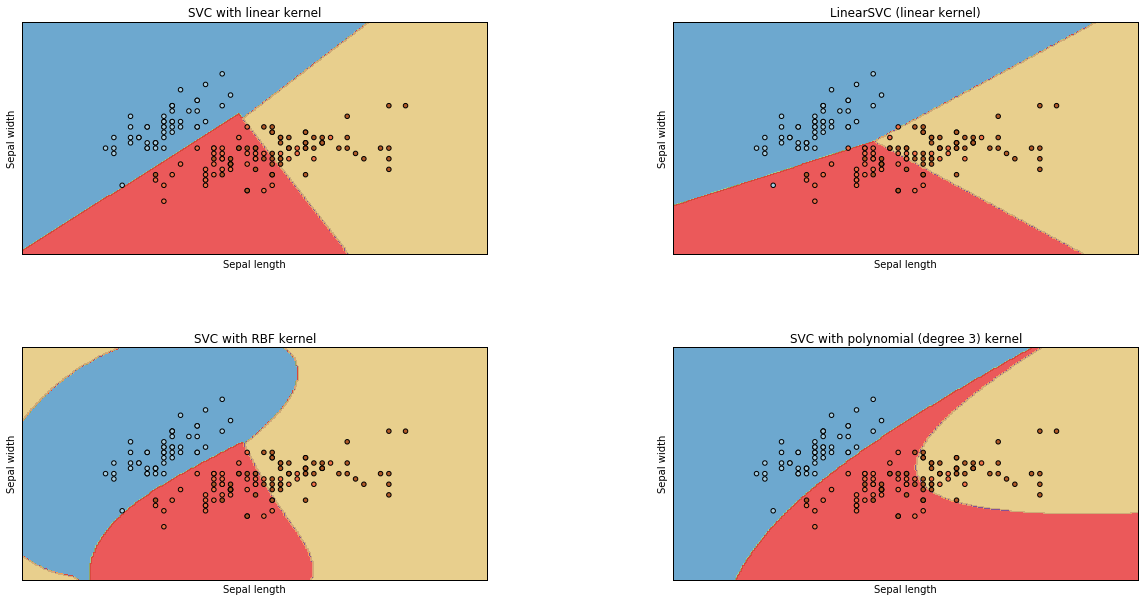

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.datasets import load_iris

iris = load_iris()
# import some data to play with
#iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(20,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()